<a href="https://colab.research.google.com/github/fahimabrar/Hyperparameter_Tuning/blob/main/Gridsearch_CV_and_Random_search_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import cross_val_score
import numpy as np

#loading the populart breast cancer dataset

In [58]:
bc_data = datasets.load_breast_cancer()

In [59]:
bc_data.target_names
# there are two target class

array(['malignant', 'benign'], dtype='<U9')

In [60]:
df = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
# we loaded iris dataset from sklearn datasets and converted them to a pandas dataFrame to see the features names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Little EDA

In [61]:
np.shape(bc_data.data)

(569, 30)

In [62]:
np.shape(bc_data.target)

(569,)

# **Principal Component Analysis**

In [65]:
from sklearn import decomposition
from sklearn.preprocessing import scale

In [67]:
scaled_data = scale(df)
pca = decomposition.PCA(n_components = 4)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
scores = pca.transform(scaled_data)
pca_df = pd.DataFrame(scores, columns=["pc1", "pc2", "pc3", "pc4"])
pca_df.head()

,pc1,pc2,pc3,pc4
0,9.192837,1.948583,-1.123166,3.633731
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912083
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389767,2.940639


In [71]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns = ['pc1', 'pc2', "pc3", "pc4"], index =df.columns)
df_loadings

,pc1,pc2,pc3,pc4
mean radius,0.218902,-0.233857,-0.008531,0.041409
mean texture,0.103725,-0.059706,0.064550,-0.603050
mean perimeter,0.227537,-0.215181,-0.009314,0.041983
mean area,0.220995,-0.231077,0.028700,0.053434
mean smoothness,0.142590,0.186113,-0.104292,0.159383
mean compactness,0.239285,0.151892,-0.074092,0.031795
mean concavity,0.258400,0.060165,0.002734,0.019123
mean concave points,0.260854,-0.034768,-0.025564,0.065336
mean symmetry,0.138167,0.190349,-0.040240,0.067125
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587


In [72]:
pca.explained_variance_ratio_.tolist()


[0.44272025607526416,
 0.18971182044033108,
 0.09393163257431325,
 0.06602134915464679]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


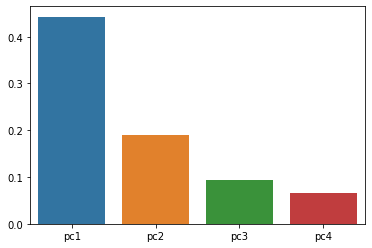

In [74]:
pca_x = [0.44272025607526416,
 0.18971182044033108,
 0.09393163257431325,
 0.06602134915464679]

pca_y =["pc1", "pc2", "pc3", "pc4"]

import seaborn as sns
sns.barplot(pca_y, pca_x)

In [76]:
pca_df.shape

(569, 4)

# Lets plot pca1 and pc2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


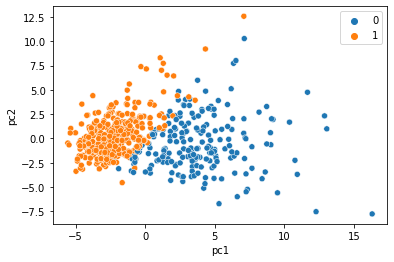

In [78]:
sns.scatterplot(pca_df.pc1, pca_df.pc2, hue=bc.target)

# Insights

## This dataset had 30 features, that is impossible to plot
## applied PCA and then visualized the data
## and see that the data is lineraly separable (class 0,1 [malignent and beningn cancers] are separable)
## This problem is a classification problem

# **Data Preparation**


In [81]:
X = bc.data
y = bc.target

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(569, 30)
(569,)


# Logistic Regression 

## for binary classification logistic regression is a popular choice

In [86]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr_clf = LogisticRegression(random_state=0)

In [90]:
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9385964912280702

## We got two tips in the form of training :D 
### lets scale the data 


In [91]:
scaled_X_train = scale(X_train)
scaled_X_test = scale(X_test)

In [93]:
lr_clf.fit(scaled_X_train, y_train)
lr_clf.score(scaled_X_test, y_test)

0.9824561403508771

# We found that accuracy is increased

# **Suppor Vector Machine**


In [97]:
from sklearn import svm
clf1 = svm.SVC(C = 1.0, kernel ='rbf', gamma= 'auto')
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.6052631578947368

In [98]:
clf2 = svm.SVC(C = 5.0, kernel ='linear', gamma= 'scale')
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9473684210526315

## WE found that with linear kernel the accuracy is increasing. 
### A reason can be the data is linearly separable (we found it through Principal Component Visualization)

# five fold Cross Validation

In [99]:
scores1 = cross_val_score(clf1, X_train, y_train, cv=5)
scores2 = cross_val_score(clf2, X_train, y_train, cv = 5)

In [100]:
print(scores1)
print()
print(scores2)

[0.63736264 0.63736264 0.63736264 0.62637363 0.62637363]

[0.95604396 0.96703297 0.94505495 0.94505495 0.95604396]


# **GridSearchCV**

In [101]:
from sklearn.model_selection import GridSearchCV

# we can reduce the tidious/repeatating task of trying with different hyperparameter (e.g. C value, kernel type) by using sklearn gridsearchCV API
# we can try different hyperparameters with gridsearchCV and train the models to find the most accurate model

In [104]:
gridclf = GridSearchCV(svm.SVC(gamma='auto'), 
                       {'C': [1, 5, 10], 'kernel':['rbf', 'linear',]}, cv = 5)

In [105]:
gridclf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
gridclf.cv_results_

{'mean_fit_time': array([0.01175776, 1.19482059, 0.01053772, 2.87768841, 0.01058164,
        2.7549129 ]),
 'mean_score_time': array([0.00235801, 0.00062418, 0.00231032, 0.00061851, 0.00231338,
        0.00061431]),
 'mean_test_score': array([0.63296703, 0.96483516, 0.63296703, 0.95384615, 0.63296703,
        0.94725275]),
 'param_C': masked_array(data=[1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 5, 'kernel': 'rbf'},
  {'C': 5, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'}],
 'rank_test_score': array([4, 1, 4, 2, 4, 3], dtype=int32),
 'split0_test_score': array([0.63736264, 0.945054

## Lets convert the result into a pandas dataframe and select only the needed columns

In [108]:
hyper_p = pd.DataFrame(gridclf.cv_results_)[["param_C", "param_kernel", "mean_test_score"]]
hyper_p

,param_C,param_kernel,mean_test_score
0,1,rbf,0.632967
1,1,linear,0.964835
2,5,rbf,0.632967
3,5,linear,0.953846
4,10,rbf,0.632967
5,10,linear,0.947253


In [109]:
gridclf.best_estimator_ 
# the best model (98% accuracy) is the one that has C = 1 and a linear kernel

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
gridclf.best_params_
# or we can only print the parameter that we defiend (not the default parameteres|)

{'C': 1, 'kernel': 'linear'}

## If the model is computatinally heavy, we can tune the parameter with the RandomizedSearchCV 
where from predefined set of hyperparameters, randomly picked parameters are tried and showed the results

we can define how many randmized parameters we wanna try

In [111]:
from sklearn.model_selection import RandomizedSearchCV
randclf = RandomizedSearchCV(svm.SVC(gamma='auto'), 
                       {'C': [1, 5, 10, 20], 'kernel':['rbf', 'linear',]}, cv = 5, n_iter = 3)

# here n_iter = 3 means we want the output for 3 randomized hyperparameters

In [112]:
randclf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=3, n_jobs=None,
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [113]:
pd.DataFrame(randclf.cv_results_)[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.632967
1,20,linear,0.956044
2,5,rbf,0.632967


# we can see we defiend lots of types of hyperparameters in randomizedCV, but it randomly selected 3 sets of parameters and trained the model with them

# Lets practise this again for KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [115]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [116]:
neigh.score(X_test, y_test)

0.9385964912280702

In [117]:
gcf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv =3)

In [118]:
gcf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
pd.DataFrame(gcf.cv_results_)[["param_n_neighbors", "mean_test_score"]]

,param_n_neighbors,mean_test_score
0,1,0.914241
1,2,0.912092
2,3,0.929636
3,4,0.918685
4,5,0.925264
5,6,0.925264
6,7,0.920878
7,8,0.927457
8,9,0.929679
9,10,0.925279
